In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

C:\Users\vatgh\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\vatgh\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
uniform = np.ones(18) * (1 / 18)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '40'),
  Text(3, 0, '60'),
  Text(4, 0, '80'),
  Text(5, 0, '100'),
  Text(6, 0, '120'),
  Text(7, 0, '140'),
  Text(8, 0, '160'),
  Text(9, 0, '180'),
  Text(10, 0, '200'),
  Text(11, 0, '220'),
  Text(12, 0, '240'),
  Text(13, 0, '260'),
  Text(14, 0, '280'),
  Text(15, 0, '300'),
  Text(16, 0, '320'),
  Text(17, 0, '340')])

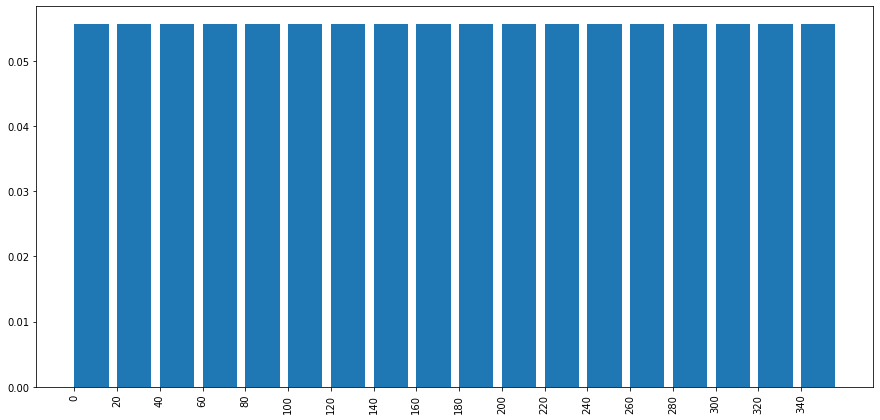

In [3]:
fig, ax = plt.subplots(figsize = (15,7))
ax.bar(x=np.arange(uniform.size), height=uniform, align = 'edge', tick_label = np.arange(uniform.size)*20)
plt.xticks(rotation = 90)

In [4]:
def get_circular_features(distrib):
    w = distrib
    angles = pg.convert_angles(np.arange(distrib.size) * 20, positive = False)
    z, pval = pg.circ_rayleigh(angles=angles, w = w)
    mu = pg.circ_mean(angles=angles, w = w) + np.pi
    mu = np.degrees(mu)
    r = pg.circ_r(angles=angles, w = w)
    return round(pval, 3), round(mu, 3), round(r, 3)

In [5]:
distrib = np.random.rand(18)
distrib = distrib / sum(distrib)
# distrib = np.ones(18) * (1 / 18)

Text(0.5, 1.0, 'Rayleigh : 0.951 , circ_mean : 0.295 , circ_r : 0.274')

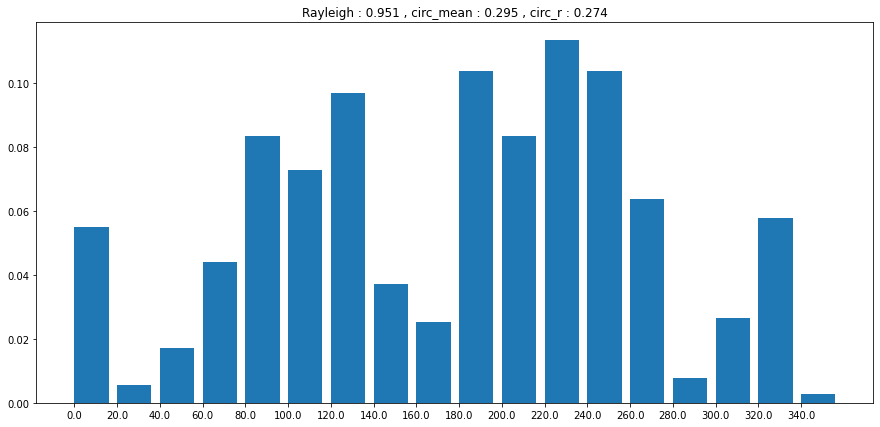

In [6]:
# distrib = test
p, mu, r = get_circular_features(distrib)

fig, ax = plt.subplots(figsize = (15,7))
ax.bar(x=np.arange(distrib.size), height=distrib, align = 'edge', tick_label = np.arange(distrib.size)*(360 / distrib.size))
ax.set_title(f'Rayleigh : {p} , circ_mean : {mu} , circ_r : {r}')

In [7]:
rows = []
for i in range(1000):
    distrib = np.random.rand(18)
    distrib = distrib / sum(distrib)
    p, mu, r = get_circular_features(distrib)
    rows.append([p, mu , r])
df = pd.DataFrame(rows, columns = ['p','mu','r'])

In [8]:
df.describe()

,p,mu,r
count,1000.000000,1000.000000,1000.000000
mean,0.987317,184.023479,0.122050
std,0.013231,104.029604,0.065573
min,0.893000,0.325000,0.003000
25%,0.983000,93.958000,0.074000
50%,0.991000,180.596500,0.114000
75%,0.996000,273.674500,0.160000
max,1.000000,359.933000,0.409000


<AxesSubplot:>

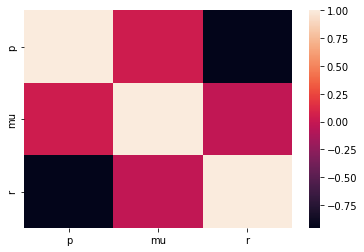

In [9]:
sns.heatmap(df.corr('pearson'))

In [10]:
df.corr()

,p,mu,r
p,1.000000,0.034957,-0.954657
mu,0.034957,1.000000,-0.028500
r,-0.954657,-0.028500,1.000000


In [11]:
test = np.array([1,1,2,2,2,3,3,4,100,4,3,3,3,2,2,2,1,1])
test = test / sum(test)

In [12]:
test

array([0.00719424, 0.00719424, 0.01438849, 0.01438849, 0.01438849,
       0.02158273, 0.02158273, 0.02877698, 0.71942446, 0.02877698,
       0.02158273, 0.02158273, 0.02158273, 0.01438849, 0.01438849,
       0.01438849, 0.00719424, 0.00719424])

In [13]:
def get_circ_features(angles):
    z, pval = pg.circ_rayleigh(angles)
    mu = pg.circ_mean(angles) #+ np.pi
    mu = np.degrees(mu)
    r = pg.circ_r(angles)
    if mu < 0:
        mu = 360 + mu
    return round(pval, 3), int(mu), round(r, 3)

In [14]:
angles = np.random.randint(0, 360, size = 360)

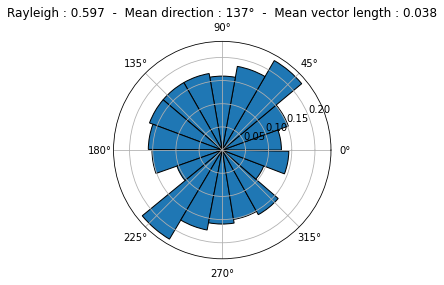

In [15]:
# angles = np.arange(0, 360, 1)

# random.shuffle(angles)
angles = pg.convert_angles(angles, positive = True)
p, mu , r = get_circ_features(angles)
# print(angles)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.hist(angles, bins = 18, edgecolor = 'black', density=True)
ax.set_title(f'Rayleigh : {p}  -  Mean direction : {mu}°  -  Mean vector length : {r}')
plt.show()

In [16]:
from pycircstat import watson_williams

In [18]:
watson_williams

<function pycircstat.tests.watson_williams(*args, **kwargs)>

In [66]:
angles1 = np.random.randint(0, 360, size = 360)
angles2 = np.random.randint(0, 360, size = 360)

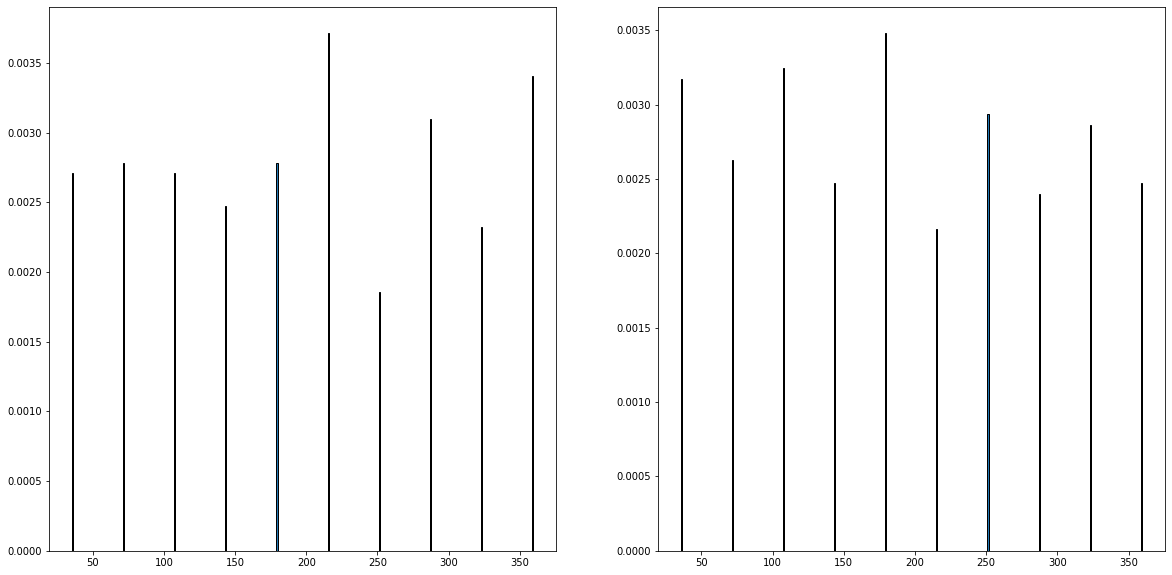

In [80]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,10))

for col, angles in enumerate([angles1, angles2]):
    ax = axs[col]
    hist, bin_edges = np.histogram(angles, bins = 10, density = True) 
    ax.bar(x=bin_edges[1:] , height=hist, edgecolor = 'black')

plt.show()

# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# hist, bin_edges = np.histogram(angles2, bins = 18, density = True)
# ax.bar(x=bin_edges[1:] , height=hist, edgecolor = 'black')
# plt.show()

In [34]:
p, T = watson_williams(distributions[0], distributions[1])

C:\Users\vatgh\anaconda3\lib\site-packages\pycircstat\tests.py:417: UserWarning: Test not applicable. Average resultant vector length < 0.45.
  'Test not applicable. Average resultant vector length < 0.45.')
